In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns
from pypfopt import plotting  # For plotting efficient frontier

In [167]:
"""
start_date = '2022-06-01' # inclusive
end_date = '2024-09-20' # exclusive
"""

budget = 100  # Example total investment (you can change this value)


# Example data (replace with actual prices)
data = pd.read_csv("close.csv", parse_dates=True, index_col="Date")


# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data)
# S = risk_models.sample_cov(data)
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()

This classical model maximizes the Sharpe ratio of a portfolio of 48 stocks.

PyPfOpt calculates the Sharpe ratio as $$S_R = \frac{\mu - \text{Risk-free rate}}{\sigma} = \frac{\mu - 0.02}{\sigma}$$

However, do also note that PyPfOpt calcluates <b>log returns</b>. This means the each return is $r_{i+1} = \log \left(1 + \frac{p_{i+1} - p_{i}}{p_{i}} \right)$ and the mean historical return is $\left[ \Pi_{i=2}^n \left( 1 + r_{i+1} \right) \right]^{n} - 1$. The covariance matrix is made with log returns, <u>then multiplied by $n$.</u>

In [170]:
# Optimize for maximum Sharpe ratio

ef = EfficientFrontier(mu, S)
ef.add_constraint(lambda w: w <= 0.1)  # Limit weights to 10%
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict({'AAPL': 0.0, 'MSFT': 0.0, 'GOOGL': 0.0, 'AMZN': 0.0, 'TSLA': 0.0, 'META': 0.0547, 'NFLX': 0.1, 'NVDA': 0.1, 'JPM': 0.1, 'BAC': 0.0, 'WMT': 0.1, 'PG': 0.05358, 'V': 0.0, 'MA': 0.0, 'DIS': 0.0, 'PEP': 0.0, 'KO': 0.08021, 'UNH': 0.04515, 'PFE': 0.0, 'MRK': 0.1, 'T': 0.0, 'VZ': 0.0, 'CSCO': 0.0, 'INTC': 0.0, 'ORCL': 0.1, 'ADBE': 0.0, 'CRM': 0.0, 'BABA': 0.0, 'XOM': 0.01947, 'CVX': 0.0, 'GS': 0.0, 'SPY': 0.0, 'QQQ': 0.0, 'IWM': 0.0, 'DIA': 0.0, 'TLT': 0.0, 'GLD': 0.1, 'SLV': 0.0, 'XLF': 0.0, 'XLK': 0.0, 'XLE': 0.0, 'XLV': 0.0, 'ARKK': 0.0, 'GDX': 0.0, 'BA': 0.0, 'NKE': 0.0, 'MCD': 0.04688, 'SBUX': 0.0})


In [172]:
# Portfolio performance
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 39.5%
Annual volatility: 15.2%
Sharpe Ratio: 2.48


In [174]:
# Define total amount of money to invest

total_investment = budget

print("\nTotal Money Invested:", total_investment, "dollars")
# Calculate money invested in each stock
money_invested = {stock: weight * total_investment for stock, weight in cleaned_weights.items()}
print("\nMoney Invested in Each Stock:")
for stock, amount in money_invested.items():
    print(f"{stock}: ${amount:,.2f}")


Total Money Invested: 180 dollars

Money Invested in Each Stock:
AAPL: $0.00
MSFT: $0.00
GOOGL: $0.00
AMZN: $0.00
TSLA: $0.00
META: $9.85
NFLX: $18.00
NVDA: $18.00
JPM: $18.00
BAC: $0.00
WMT: $18.00
PG: $9.64
V: $0.00
MA: $0.00
DIS: $0.00
PEP: $0.00
KO: $14.44
UNH: $8.13
PFE: $0.00
MRK: $18.00
T: $0.00
VZ: $0.00
CSCO: $0.00
INTC: $0.00
ORCL: $18.00
ADBE: $0.00
CRM: $0.00
BABA: $0.00
XOM: $3.50
CVX: $0.00
GS: $0.00
SPY: $0.00
QQQ: $0.00
IWM: $0.00
DIA: $0.00
TLT: $0.00
GLD: $18.00
SLV: $0.00
XLF: $0.00
XLK: $0.00
XLE: $0.00
XLV: $0.00
ARKK: $0.00
GDX: $0.00
BA: $0.00
NKE: $0.00
MCD: $8.44
SBUX: $0.00


Given weights $w_1 + \dots + w_n = 100 \%$, where $w_i = \frac{V_i}{V_p}$ is the $i$th asset's value as a fraction of the the portfolio's value:
- the portfolio's expected rate of return is the weighted average $k_p = \sum^n_{i=1} w_i k_{ei}$
- the portfolio's risk is the standard deviation $\sqrt{\sum^n_{i=1} \sum^n_{j=1} w_i w_j \text{Cov}_{ij}}$. (As you might imagine, the variation can also be a measure of risk.)

<Axes: xlabel='Volatility', ylabel='Return'>

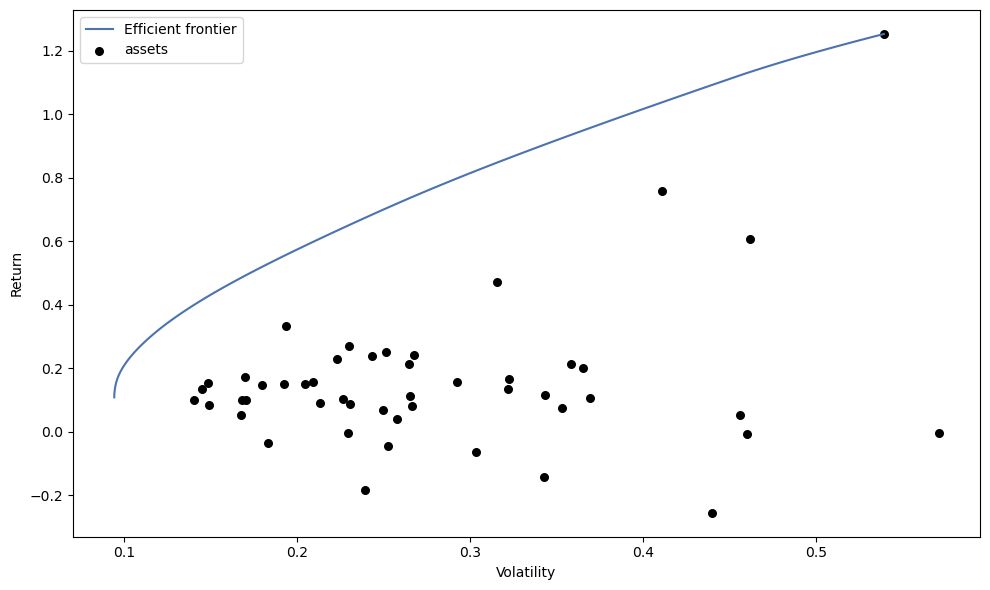

In [177]:
# Create a new EfficientFrontier instance for plotting
ef_for_plotting = EfficientFrontier(mu, S)

# Plot Efficient Frontier (Risk vs Return)
fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)

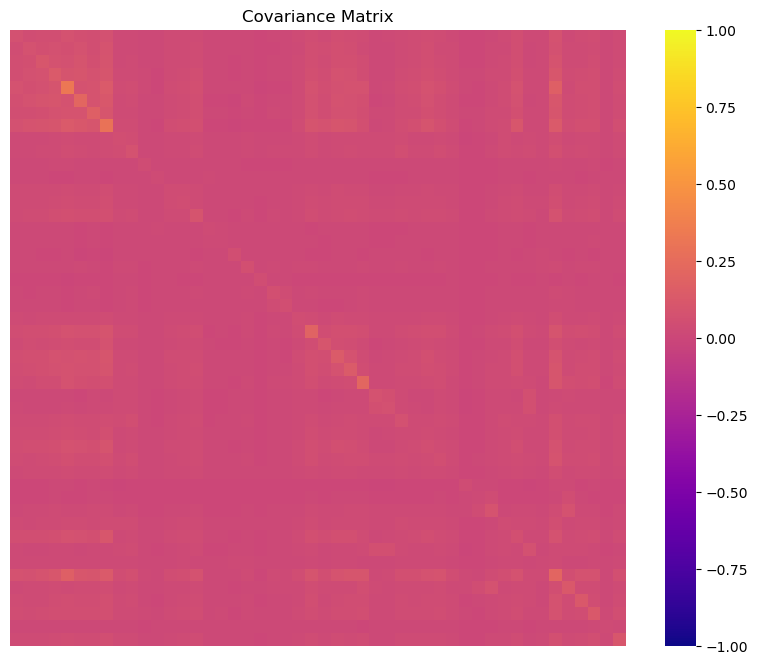

In [178]:
# Plot covariance matrix as a heatmap without stock labels
plt.figure(figsize=(10, 8))
sns.heatmap(S, annot=False, cmap="plasma", cbar=True, square=True,
            vmin=-1, vmax=1, xticklabels=False, yticklabels=False)
plt.title("Covariance Matrix")
plt.show()